<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Cost_of_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
filename_list = ['2004-05.xls','2005-06.xls','2006-07.xls','2007-08.xls','2008-09.xls','2009-10.xls','2010-11.xls','2011-12.xls','2012-13.xls','2013-14.xls','2014-15.xls','2015-16.xls']
for filename in filename_list:
    down_link = "https://eands.dacnet.nic.in/"+filename
    print(down_link)
    os.system("wget -N "+down_link)
!ls -l 


https://eands.dacnet.nic.in/2004-05.xls
https://eands.dacnet.nic.in/2005-06.xls
https://eands.dacnet.nic.in/2006-07.xls
https://eands.dacnet.nic.in/2007-08.xls
https://eands.dacnet.nic.in/2008-09.xls
https://eands.dacnet.nic.in/2009-10.xls
https://eands.dacnet.nic.in/2010-11.xls
https://eands.dacnet.nic.in/2011-12.xls
https://eands.dacnet.nic.in/2012-13.xls
https://eands.dacnet.nic.in/2013-14.xls
https://eands.dacnet.nic.in/2014-15.xls
https://eands.dacnet.nic.in/2015-16.xls
total 4008
-rw-r--r-- 1 root root 319488 Dec 22  2014 2004-05.xls
-rw-r--r-- 1 root root 342528 Dec 22  2014 2005-06.xls
-rw-r--r-- 1 root root 353280 Dec 22  2014 2006-07.xls
-rw-r--r-- 1 root root 345600 Dec 22  2014 2007-08.xls
-rw-r--r-- 1 root root 359424 Dec 22  2014 2008-09.xls
-rw-r--r-- 1 root root 350208 Dec 22  2014 2009-10.xls
-rw-r--r-- 1 root root 348672 Dec 22  2014 2010-11.xls
-rw-r--r-- 1 root root 322560 Nov 20  2014 2011-12.xls
-rw-r--r-- 1 root root 334848 Aug  6  2015 2012-13.xls
-rw-r--r-- 1 r

In [0]:
dataframe_wheat_list = []
for filename in filename_list:
    dataframe_wheat_list.append(pd.read_excel(filename,sheet_name = 'Wheat',skiprows=[0,1,2]))

In [4]:
for dataframe_wheat in dataframe_wheat_list:
    print(dataframe_wheat.shape)
    print(dataframe_wheat.columns)
    print(dataframe_wheat.head())

(65, 14)
Index(['Sl No', 'Items                          States', 'Unnamed: 2', 'Bihar',
       'Chhatisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
       'Madhya Pradesh', 'Punjab', 'Rajasthan', 'Uttar Pradesh',
       'Uttarakhand'],
      dtype='object')
   Sl No Items                          States  ... Uttar Pradesh  Uttarakhand
0  I-1.1     Cost of Cultivation (Rs./Hectare)  ...      11648.25     11142.87
1    1.2                                   NaN  ...      11753.10     11142.87
2    1.3                                   NaN  ...      13078.11     12779.29
3    1.4                                   NaN  ...      18653.37     17261.62
4    1.5                                   NaN  ...      15237.30     16360.16

[5 rows x 14 columns]
(65, 15)
Index(['Sl no', 'Items                          States', 'Unnamed: 2', 'Bihar',
       'Chhatisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
       'Madhya Pradesh', 'Punjab', 'Rajasthan', 'Uttar Prades

In [0]:
rows_of_interest = np.array([37,48,51,54,55,58,60]) - 3 -2 #The subtraction by 3 is to account for the three rows skipped in the beginning and -2 is for the header row plus indexing by zero
dataframe_wheat_truncated_list = []
for dataframe in dataframe_wheat_list:
    dataframe_wheat_truncated_list.append(dataframe.iloc[rows_of_interest,:])

In [6]:
for dataframe_wheat in dataframe_wheat_truncated_list:
    print(dataframe_wheat.shape)
    print(dataframe_wheat.columns)
    print(dataframe_wheat.head(7))

(7, 14)
Index(['Sl No', 'Items                          States', 'Unnamed: 2', 'Bihar',
       'Chhatisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
       'Madhya Pradesh', 'Punjab', 'Rajasthan', 'Uttar Pradesh',
       'Uttarakhand'],
      dtype='object')
     Sl No Items                          States  ... Uttar Pradesh  Uttarakhand
32       9          Derived Yield (Qtl./Hectare)  ...         29.29        26.10
43  11.1.4                                 Total  ...       3483.24      4428.85
46  11.2.3                                 Total  ...        506.64      4066.76
49  11.3.3                                 Total  ...       2969.25      1662.70
50    11.4                                  Seed  ...       1233.23      1257.88
53  11.5.3                                 Total  ...       2133.71      1953.16
55    11.7                    Irrigation Charges  ...       2630.44       328.65

[7 rows x 14 columns]
(7, 15)
Index(['Sl no', 'Items                        

In [7]:
for dataframe in dataframe_wheat_truncated_list:
    dataframe.drop(columns=dataframe.columns[0:3],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
for count in range(len(dataframe_wheat_truncated_list)):
    dataframe_wheat = dataframe_wheat_truncated_list[count]
    dataframe_wheat.insert(0,'Features',['Yield','Human Labour','Animal Labour','Machine Labour','Seed','Fert_Manu','Irrig_Charges'])
    dataframe_wheat.set_index('Features',inplace=True)
    dataframe_wheat = dataframe_wheat.apply(pd.to_numeric,errors='coerce') # convert data to numbers
    dataframe_wheat_truncated_list[count] = dataframe_wheat
    print(dataframe_wheat_truncated_list[count].shape)
    print(dataframe_wheat_truncated_list[count].columns)
    print(dataframe_wheat_truncated_list[count].head())

(7, 11)
Index(['Bihar', 'Chhatisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Madhya Pradesh', 'Punjab', 'Rajasthan', 'Uttar Pradesh',
       'Uttarakhand'],
      dtype='object')
                  Bihar  Chhatisgarh  ...  Uttar Pradesh  Uttarakhand
Features                              ...                            
Yield             22.70        10.61  ...          29.29        26.10
Human Labour    2560.00      2125.93  ...        3483.24      4428.85
Animal Labour    653.24       499.92  ...         506.64      4066.76
Machine Labour  2201.35      1065.43  ...        2969.25      1662.70
Seed            1089.49      1037.42  ...        1233.23      1257.88

[5 rows x 11 columns]
(7, 12)
Index(['Bihar', 'Chhatisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Madhya Pradesh', 'Punjab', 'Rajasthan', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'],
      dtype='object')
                  Bihar  Chhatisgarh  ...  Uttarakhand  West Ben

In [9]:
for dataframe_wheat in dataframe_wheat_truncated_list:
    print(dataframe_wheat.shape)
    print(dataframe_wheat.index)
    print(dataframe_wheat.columns)
    print(dataframe_wheat.head(7))

(7, 11)
Index(['Yield', 'Human Labour', 'Animal Labour', 'Machine Labour', 'Seed',
       'Fert_Manu', 'Irrig_Charges'],
      dtype='object', name='Features')
Index(['Bihar', 'Chhatisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Madhya Pradesh', 'Punjab', 'Rajasthan', 'Uttar Pradesh',
       'Uttarakhand'],
      dtype='object')
                  Bihar  Chhatisgarh  ...  Uttar Pradesh  Uttarakhand
Features                              ...                            
Yield             22.70        10.61  ...          29.29        26.10
Human Labour    2560.00      2125.93  ...        3483.24      4428.85
Animal Labour    653.24       499.92  ...         506.64      4066.76
Machine Labour  2201.35      1065.43  ...        2969.25      1662.70
Seed            1089.49      1037.42  ...        1233.23      1257.88
Fert_Manu       1613.74       829.61  ...        2133.71      1953.16
Irrig_Charges   1740.98      1851.77  ...        2630.44       328.65

[7 rows x 11 

In [10]:
combined_dataframe = pd.concat(dataframe_wheat_truncated_list,axis=1,sort=False)
combined_dataframe.head(30)

,Bihar,Chhatisgarh,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Madhya Pradesh,Punjab,Rajasthan,Uttar Pradesh,Uttarakhand,Bihar,Chhatisgarh,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Madhya Pradesh,Punjab,Rajasthan,Uttar Pradesh,Uttarakhand,West Bengal,Bihar,Chhatisgarh,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Madhya Pradesh,Punjab,Rajasthan,Uttar Pradesh,Uttarakhand,West Bengal,Bihar,Chhatisgarh,Gujarat,Haryana,Himachal Pradesh,...,West Bengal,Bihar,Chhatisgarh,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Madhya Pradesh,Maharashtra,Punjab,Rajasthan,Uttar Pradesh,Uttarakhand,West Bengal,Bihar,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Madhya Pradesh,Maharashtra,Punjab,Rajasthan,Uttar Pradesh,Uttarakhand,West Bengal,Bihar,Gujarat,Haryana,Himachal Pradesh,Jharkhand,Karnataka,Madhya Pradesh,Maharashtra,Punjab,Rajasthan,Uttar Pradesh,Uttarakhand,West Bengal
Features,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yield,22.70,10.61,32.38,39.48,14.96,13.60,21.79,42.94,32.95,29.29,26.10,18.78,10.78,33.37,38.65,15.80,12.62,20.30,42.05,33.76,28.59,23.41,19.90,20.50,14.38,31.65,39.76,19.56,11.93,22.91,42.10,36.46,31.92,25.20,21.40,23.90,13.03,35.79,41.99,18.93,...,29.02,27.55,14.28,36.88,45.26,15.30,22.41,29.98,27.28,50.23,40.98,34.58,25.41,31.35,26.52,31.39,39.96,14.32,13.86,10.16,32.73,22.44,42.88,34.58,25.88,24.24,30.82,26.77,30.88,43.09,13.17,16.18,6.89,30.60,24.83,46.53,37.54,31.99,32.86,22.85
Human Labour,2560.00,2125.93,3667.32,3866.63,3152.11,3459.85,2260.03,1952.42,4618.55,3483.24,4428.85,2668.03,2324.42,3497.29,4439.80,2888.77,3363.48,2711.85,2914.90,4467.95,3691.60,4328.44,5692.90,2762.99,2217.46,3497.37,4725.17,3492.91,3830.32,2933.73,3309.21,4650.83,4130.27,4561.69,6375.13,2735.11,2135.50,3941.18,5507.37,4223.22,...,14617.03,7443.02,6987.46,10346.67,13931.34,9748.24,5237.17,6853.77,10881.71,5620.87,15325.81,9198.92,10218.91,16444.59,9562.08,9832.20,12353.29,10955.95,7889.34,9822.58,8469.54,11976.83,5437.08,16927.60,10996.90,7552.27,19806.56,10409.92,8790.10,12106.01,11333.13,7140.48,11040.82,8653.57,14581.13,5786.94,17972.52,11664.40,9061.85,16655.81
Animal Labour,653.24,499.92,405.51,183.32,299.96,3184.96,671.14,75.17,320.08,506.64,4066.76,513.61,428.65,554.21,421.66,205.13,1592.46,651.89,60.62,494.32,801.58,1953.93,2996.89,481.47,338.59,526.09,497.82,264.72,2016.39,746.38,86.35,582.94,746.65,2127.47,2598.67,459.02,53.37,578.48,185.79,227.72,...,1863.56,472.52,770.48,594.72,202.52,576.10,0.00,524.10,1629.96,68.43,531.25,528.91,1402.67,1393.49,15.41,300.98,5.00,676.43,999.72,2244.50,774.49,1653.59,49.19,397.60,584.45,3508.61,2342.31,27.66,239.46,96.38,1090.37,361.82,2567.45,547.22,2437.50,47.22,320.64,652.01,6192.20,2427.33
Machine Labour,2201.35,1065.43,2166.50,3728.33,1595.98,31.15,1533.38,3866.05,2063.90,2969.25,1662.70,2454.92,1070.75,1969.26,4359.98,2544.76,2077.94,1992.20,4131.66,2472.20,3091.88,1765.63,322.66,2346.81,1903.96,2595.67,4142.79,2860.61,1789.69,2102.40,4458.15,2892.18,3767.59,2074.33,450.78,2754.20,1963.69,2653.16,4839.71,3053.56,...,2941.58,4916.03,4388.44,5190.34,7722.64,4285.72,8016.06,5451.65,8725.70,8207.74,5487.32,6590.77,2361.36,3486.06,5634.81,6269.97,8604.72,4085.47,2994.91,3142.59,6632.69,6799.37,8276.24,5595.47,6203.57,3824.14,3616.36,5936.40,6068.86,9045.38,4229.09,3571.02,3058.27,6696.62,8102.42,8365.19,5916.23,6776.03,5568.93,3441.69
Seed,1089.49,1037.42,1678.34,1013.50,1005.51,932.72,997.84,865.35,1323.06,1233.23,1257.88,1294.00,1149.96,1675.56,1090.79,1003.12,1395.57,1167.39,931.04,1505.22,1396.23,1137.42,1617.81,1378.74,1377.73,2171.29,1334.95,1233.46,1640.47,1572.37,1078.48,1898.83,1755.31,1544.91,1890.10,1460.88,1830.91,2265.00,1442.83,1428.36,...,2758.01,2546.09,2089.91,4125.54,2375.86,1778.59,2726.00,2685.59,3604.52,2054.19,3286.77,2788.73,2222.92,3466.17,2994.30,4184.80,2356.10,1855.97,2624.13,2452.51,2589.10,3846.36,1961.84,3432.66,3177.11,2397.03,4159.92,3234.08,4337.26,2408.99,1855.67,2848.87,2162.31,2839.95,3437.03,2169.31,3542.34,3330.46,

Text(0.5, 0, 'State')

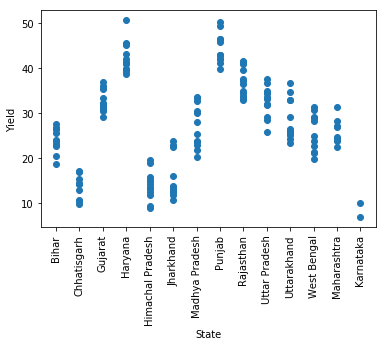

In [11]:
plt.scatter(combined_dataframe.columns,combined_dataframe.loc['Yield'])
plt.xticks(rotation=90)
plt.ylabel('Yield')
plt.xlabel('State')

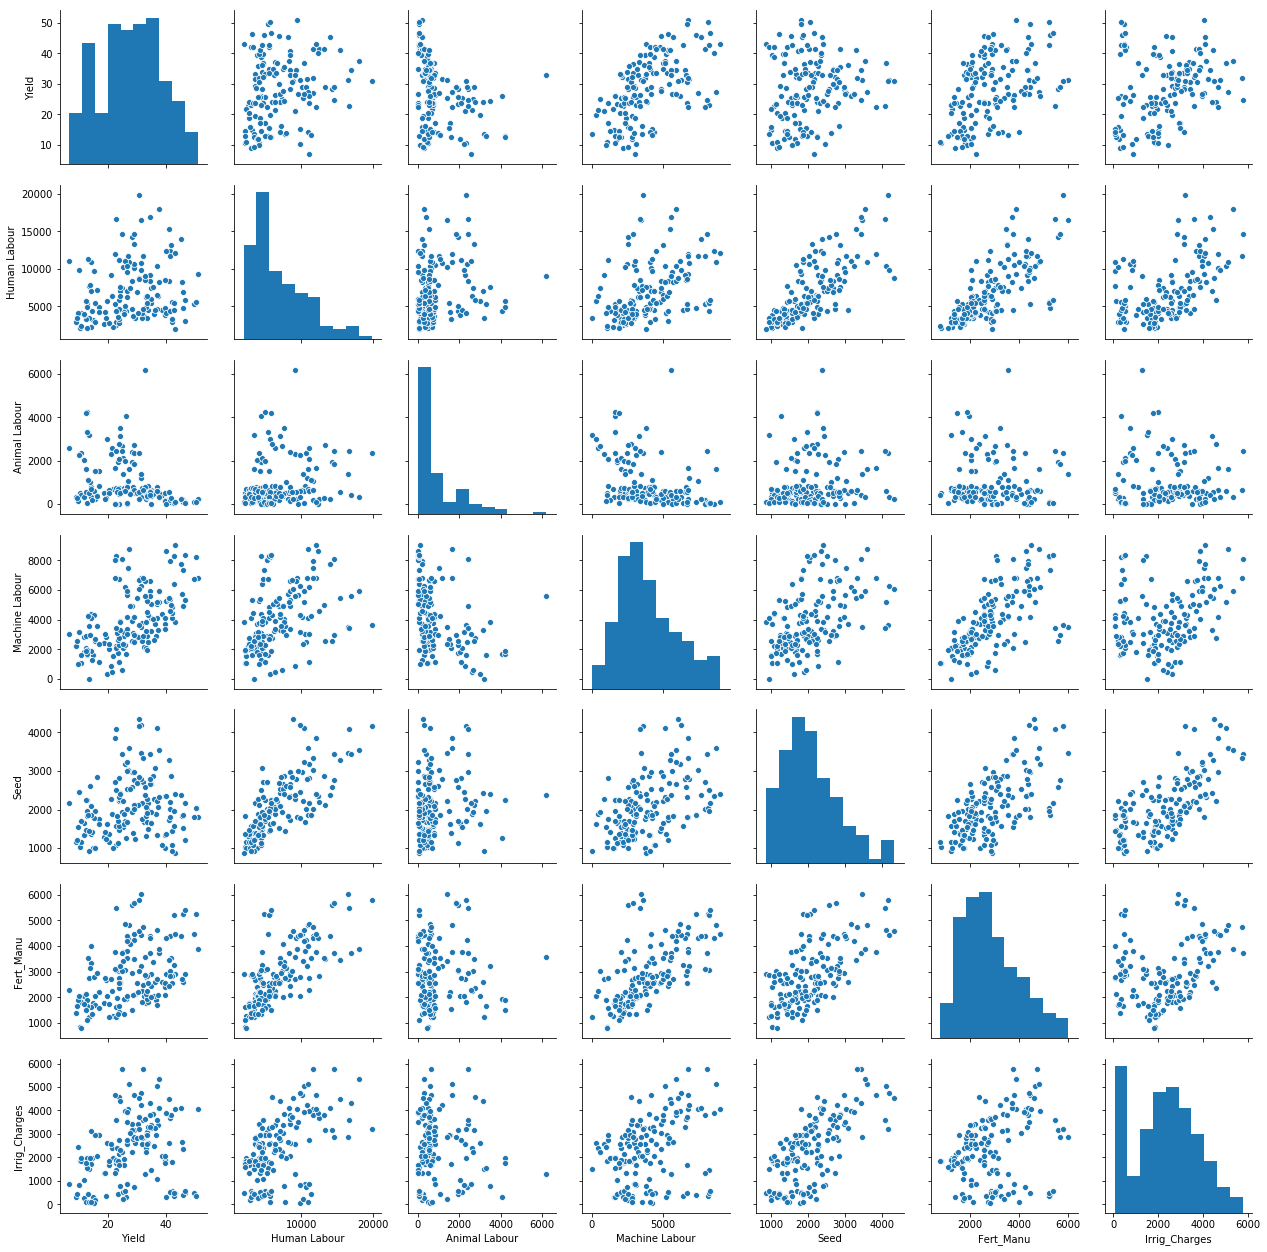

In [12]:
sns.pairplot(combined_dataframe.transpose())

In [13]:
# Linear Regression on yield
# First we will transpose the data, so the the features become the columns
combined_dataframe_transpose = combined_dataframe.transpose()
combined_dataframe_transpose.head()
combined_dataframe_transpose.dtypes 

Features
Yield             float64
Human Labour      float64
Animal Labour     float64
Machine Labour    float64
Seed              float64
Fert_Manu         float64
Irrig_Charges     float64
dtype: object

In [0]:
y_data = combined_dataframe_transpose['Yield']
x_data = combined_dataframe_transpose.iloc[:,1:]

In [15]:
x_data.head()

Features,Human Labour,Animal Labour,Machine Labour,Seed,Fert_Manu,Irrig_Charges
Bihar,2560.00,653.24,2201.35,1089.49,1613.74,1740.98
Chhatisgarh,2125.93,499.92,1065.43,1037.42,829.61,1851.77
Gujarat,3667.32,405.51,2166.50,1678.34,2055.75,2856.29
Haryana,3866.63,183.32,3728.33,1013.50,2406.99,1893.87
Himachal Pradesh,3152.11,299.96,1595.98,1005.51,1762.73,311.84


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # import class to normalise data, i.e., make it zero mean and unit variance
scaler = StandardScaler()
x_data_normalized = scaler.fit_transform(x_data) # normalize data

lin_reg = LinearRegression() #
lin_reg.fit(x_data_normalized,y_data)


#print("regression coefficients = ", lin_reg.coef_)
#print("regression intercept (bias) = ", lin_reg.intercept_)
print("regression R^2 score = ", lin_reg.score(x_data_normalized,y_data))

regression R^2 score =  0.4823236397078068


Text(0.5, 0, 'State')

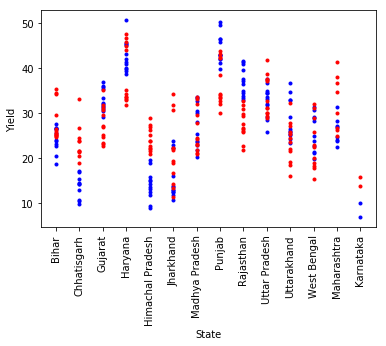

In [17]:
y_predict = lin_reg.predict(x_data_normalized)
plt.plot(combined_dataframe.columns,combined_dataframe.loc['Yield'],'.b') # true yields
plt.plot(combined_dataframe.columns,y_predict,'.r') # predicted yields
plt.xticks(rotation=90)
plt.ylabel('Yield')
plt.xlabel('State')
